<a href="https://colab.research.google.com/github/bvdsb01/mLearning/blob/main/KMeansClustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Unsupervised Machine Learning - Clustering - **K Means Clustering**

Supervised ML = Support Vector, Decision Tree, Logistic Regression (Input and output(label) both were present).

In Unsupervised Clustering is most important technique.

From Cluster We get to know the inherent nature of the data and can find useful information, e.g. fraudulent transaction detection.

In K-means, we tell the algorithm, how many clusters we want.

1. Start with K centroids by putting them at random place, here k = 2.
2. Compute distance of every point from centroid and cluster them accordingly.
3. Adjust Centroids so that they become centre of gravity for given cluster.
4. Again re-cluster every point based on their distance with centroid.
5. Again adjust centroids.
6. Recompute clusters and repeat till data points stop changing clusters.

# How to determine correct no.of clusters (k) ?

We calculate SSE = Sum of Squared Error from every centroid

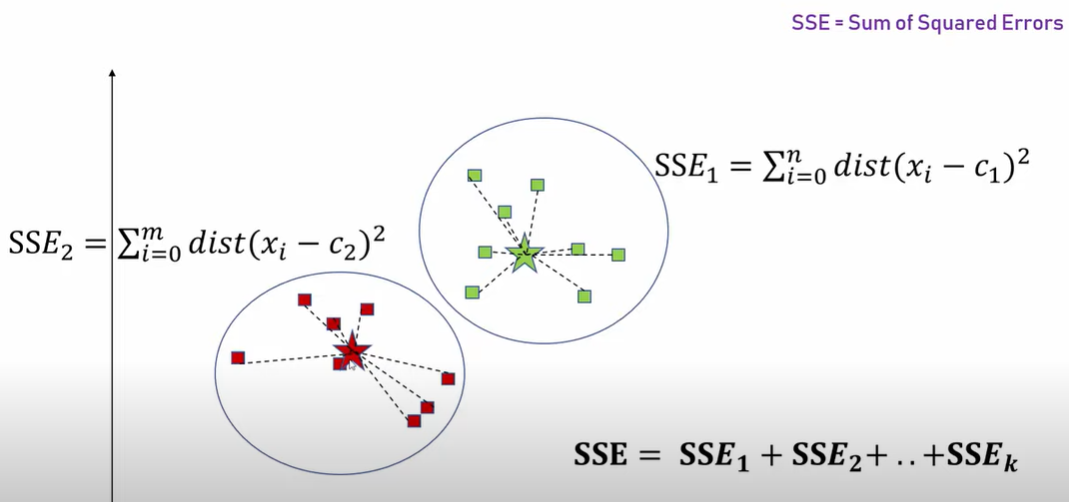

If there are like 11 points, then maximum clusters that could be formed are 11, in that case SSE becomes zero.
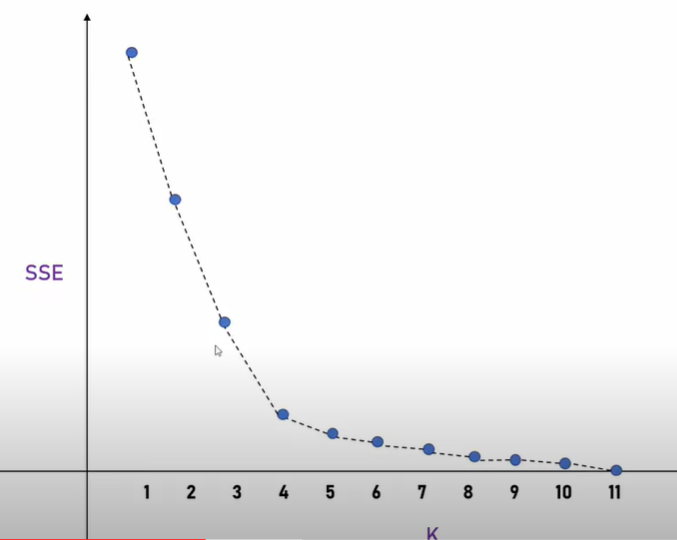

In this case, k=4 is the right/optimum number to start with = **Elbow Technique**

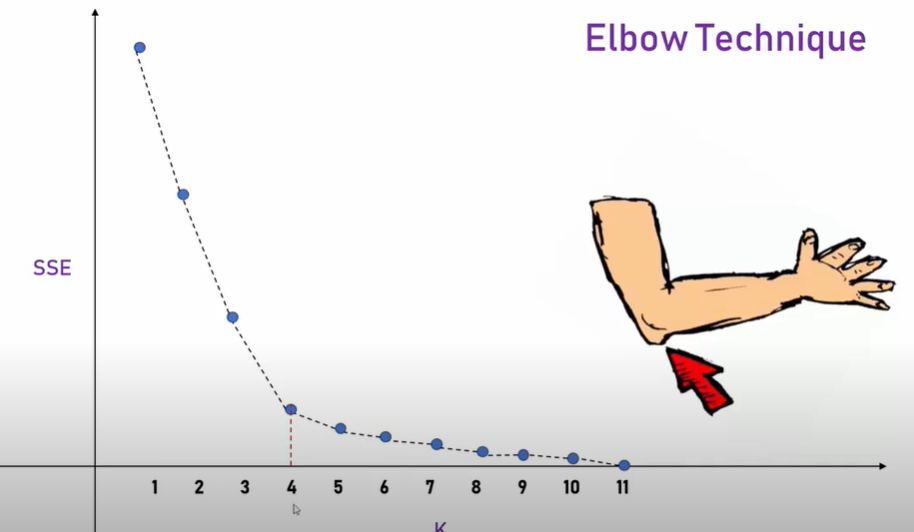

#In Machine Learning data cleaing and data visualization are very important

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

In [ ]:
df = pd.read_csv("income.csv")
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


Text(0, 0.5, 'Income')

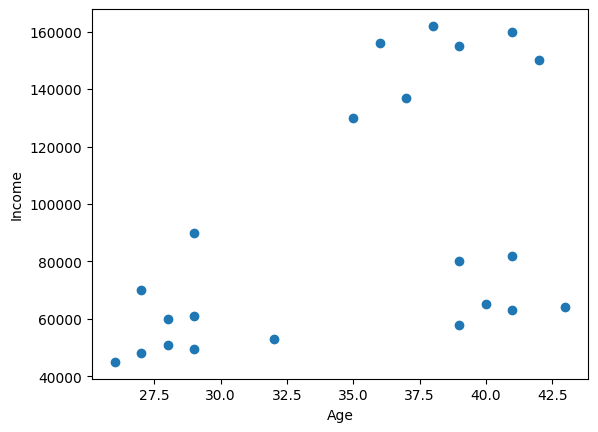

In [ ]:
plt.scatter(df.Age, df['Income($)'])
plt.xlabel("Age")
plt.ylabel("Income")

In [ ]:
km = KMeans(n_clusters = 3)
y_predicted = km.fit_predict(df[['Age', 'Income($)']])
y_predicted

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2],
      dtype=int32)

In [ ]:
df['cluster'] = y_predicted
df.head()

,Name,Age,Income($),predicted,cluster
0,Rob,27,70000,0,0
1,Michael,29,90000,0,0
2,Mohan,29,61000,2,2
3,Ismail,28,60000,2,2
4,Kory,42,150000,1,1


In [ ]:
km.cluster_centers_  #gives 2d points in x and y

array([[3.40000000e+01, 8.05000000e+04],
       [3.82857143e+01, 1.50000000e+05],
       [3.29090909e+01, 5.61363636e+04]])

In [ ]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]

Text(0, 0.5, 'Income')

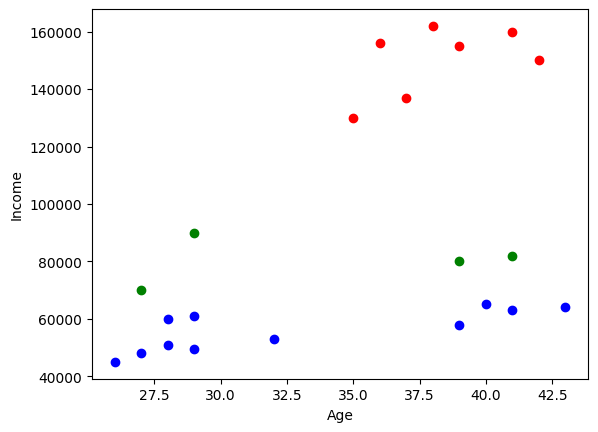

In [ ]:
plt.scatter(df1.Age, df1['Income($)'], color = 'green')
plt.scatter(df2.Age, df2['Income($)'], color = 'red')
plt.scatter(df3.Age, df3['Income($)'], color = 'blue')
plt.xlabel("Age")
plt.ylabel("Income")
#plt.legend()

In [ ]:
scaler = MinMaxScaler() #In MinMaxScaler values are normalized to the scale of 0 and 1.
scaler.fit(df[['Income($)']])
df['Income($)'] = scaler.transform(df[['Income($)']])

scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])
df.head()

,Name,Age,Income($),predicted,cluster
0,Rob,0.058824,0.213675,0,0
1,Michael,0.176471,0.384615,0,0
2,Mohan,0.176471,0.136752,2,2
3,Ismail,0.117647,0.128205,2,2
4,Kory,0.941176,0.897436,1,1


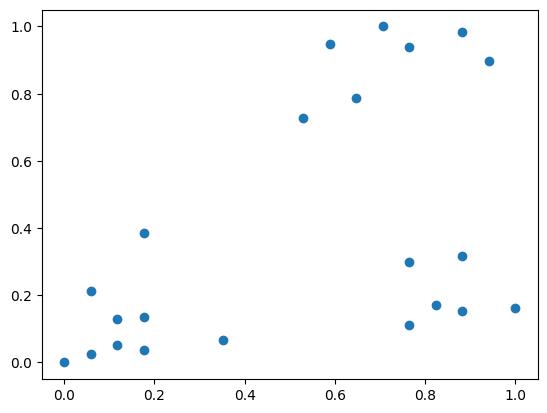

In [ ]:
plt.scatter(df['Age'],df['Income($)']) #scale has changed

In [ ]:
km = KMeans(n_clusters = 3)
y_predicted = km.fit_predict(df[['Age','Income($)']])
y_predicted  # 0,1,2 are based on cluster

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0],
      dtype=int32)

In [ ]:
df['cluster'] = y_predicted
df.head()

,Name,Age,Income($),predicted,cluster
0,Rob,0.058824,0.213675,0,1
1,Michael,0.176471,0.384615,0,1
2,Mohan,0.176471,0.136752,2,1
3,Ismail,0.117647,0.128205,2,1
4,Kory,0.941176,0.897436,1,2


In [ ]:
km.cluster_centers_

array([[0.85294118, 0.2022792 ],
       [0.1372549 , 0.11633428],
       [0.72268908, 0.8974359 ]])

In [ ]:
df1 = df[df.cluster == 0]
df2 = df[df.cluster == 1]
df3 = df[df.cluster == 2]

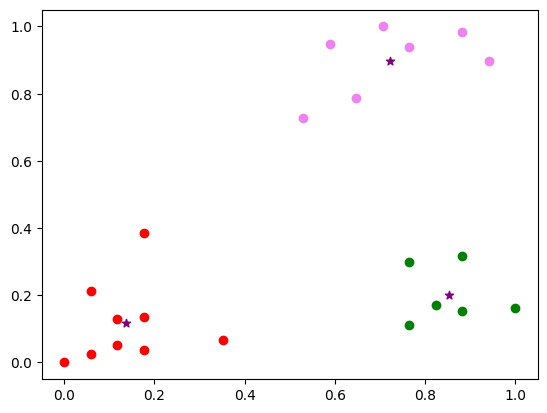

In [48]:
plt.scatter(df1.Age, df1['Income($)'], color = "green")
plt.scatter(df2.Age, df2['Income($)'], color = "red")
plt.scatter(df3.Age, df3['Income($)'], color = 'violet')

plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color = 'purple', marker = '*', label = "centroid")

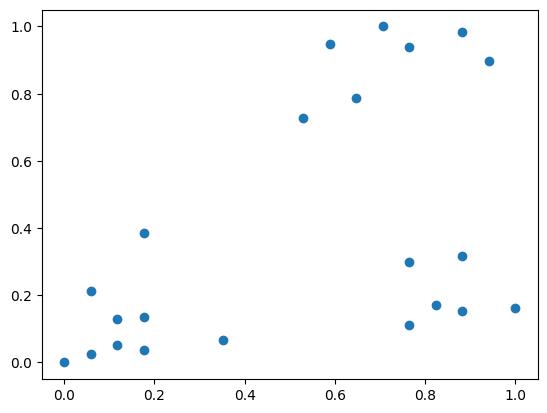